In [39]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import json
import requests

In [40]:
# Store filepath in a variable
house_rental = "Resources/House_Rent_Dataset.csv"

In [41]:
# Read our Data file with the pandas library
house_rental_df = pd.read_csv(house_rental, encoding="ISO-8859-1")

In [42]:
house_rental_df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [43]:
# Show just the header
len(house_rental_df["Area Locality"].unique())

2235

In [44]:
# Drop duplicates (if any):
house_rental_df = house_rental_df.drop_duplicates()

In [45]:
house_rental_df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [46]:
# There are no duplicates found in the list. 

In [47]:
# Clean the data by removing the "Floor" coloumn:
del house_rental_df["Floor"]

In [48]:
# Rename coloumns as follows:
house_rental_df = house_rental_df.rename(columns={"Size":"Size (ft2)", 
                                                  "Rent":"Rental Price", 
                                                  "Bathroom" : "Number of Bathrooms", 
                                                  "BHK" : "Bedrooms, Halls, Kitchens"})

In [49]:
# Change columns format as follows:
# house_rental_df["Rental Price"] = house_rental_df["Rental Price"].map("{:,.0f}".format)
# house_rental_df["Size (ft2)"] = house_rental_df["Size (ft2)"].map("{:,.0f}".format)

In [50]:
house_rental_df

,Posted On,"Bedrooms, Halls, Kitchens",Rental Price,Size (ft2),Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Number of Bathrooms,Point of Contact
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [51]:
# Find out number of each "Area Type" in the DataFrame:
house_rental_df["Area Type"].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [52]:
# Find out number of each "City" in the DataFrame:
house_rental_df["City"].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [53]:
house_rental_df["Area Locality"].value_counts()

Bandra West                       37
Gachibowli                        29
Electronic City                   24
Velachery                         22
Miyapur, NH 9                     22
                                  ..
Domlur, Domlur                     1
Erukkancheri, Kodungaiyur West     1
Karanai                            1
Vyalikaval, Malleshwaram           1
Rohini Sector 5                    1
Name: Area Locality, Length: 2235, dtype: int64

Values below -24500.0 may be outliers.
Values above 67500.0 may be outliers.


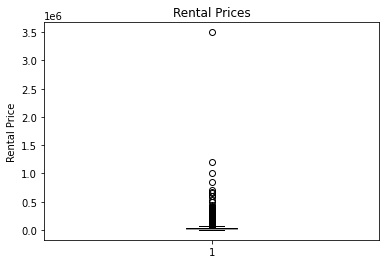

In [77]:
# Making a boxplot of rental price to check for outliers
fig1, ax1 = plt.subplots()
ax1.set_title('Rental Prices')
ax1.set_ylabel('Rental Price')
ax1.boxplot(house_rental_df["Rental Price"])
quartiles = house_rental_df["Rental Price"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} may be outliers.")
print(f"Values above {upper_bound} may be outliers.")
plt.show()

In [76]:
# Removing outliers in rental price
rental_clean_df = house_rental_df[(house_rental_df["Rental Price"] > lower_bound) & (house_rental_df["Rental Price"] < upper_bound)]
rental_clean_df

,Posted On,"Bedrooms, Halls, Kitchens",Rental Price,Size (ft2),Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Number of Bathrooms,Point of Contact
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


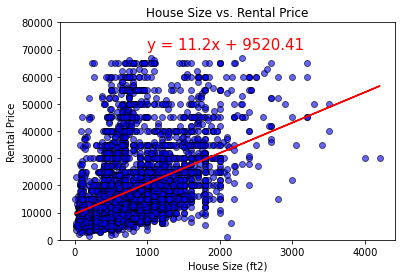

The r-value for this relationship is: 0.3936050052187456.
The plot shows a decent relationship between House Size vs. Rental Price.


In [86]:
# How important is house size for determining the rental price?


# Set x and y values:
x_values = rental_clean_df["Size (ft2)"].astype(float)
y_values = rental_clean_df["Rental Price"].astype(float)

# Use the below linregress equation to get the 5 vales before the "=" sign:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define regress values as shown below:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot both the "House Size vs. Rental Price" and the line equation values in one plot:
plt.scatter(x_values, y_values, color="blue", marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.plot(x_values ,regress_values,"r-")

plt.ylim(0,80000)
# Annotate the equation line:
plt.annotate(line_eq,(1000,70000),fontsize=15,color="red")

# Set the title, xlabel and ylabels as shown below:
plt.title("House Size vs. Rental Price")
plt.xlabel("House Size (ft2)")
plt.ylabel("Rental Price")
plt.show()

# Print the following findings:
print(f"The r-value for this relationship is: {rvalue}.")
print(f"The plot shows a decent relationship between House Size vs. Rental Price.")


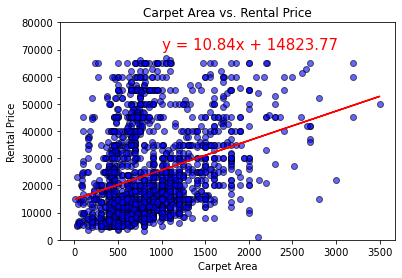

The r-value for this relationship is: 0.32534707814920033.
The plot shows a decent relationship between Carpet Area vs. Rental Price.


In [88]:
# Deep diving into the "Carpet Area" type to see its distribution with the Rental Price:


# Set x and y values:
carpet_area_df = rental_clean_df[rental_clean_df["Area Type"]=="Carpet Area"]
x_values = carpet_area_df["Size (ft2)"]
y_values = carpet_area_df["Rental Price"]

# Use the below linregress equation to get the 5 vales before the "=" sign:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)



# Define regress values as shown below:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot both the "Area Type "Carpet Area" vs. Rental Price" and the line equation values in one plot:
plt.scatter(x_values, y_values, color="blue", marker="o", facecolors="blue", edgecolors="black", alpha=0.6)
plt.ylim(0,80000)
plt.plot(x_values, regress_values,"r-")

# Annotate the equation line:
plt.annotate(line_eq,(1000,70000),fontsize=15,color="red")
# Set the title, xlabel and ylabels as shown below:
plt.title("Carpet Area vs. Rental Price")
plt.xlabel("Carpet Area")
plt.ylabel("Rental Price")
plt.show()

# Print the following findings:
print(f"The r-value for this relationship is: {rvalue}.")
print(f"The plot shows a decent relationship between Carpet Area vs. Rental Price.")

In [56]:
x_values


4        850
8        800
9       1000
10      1200
11       400
        ... 
4739    1040
4741    1000
4743    1750
4744    1500
4745    1000
Name: Size (ft2), Length: 2298, dtype: int64

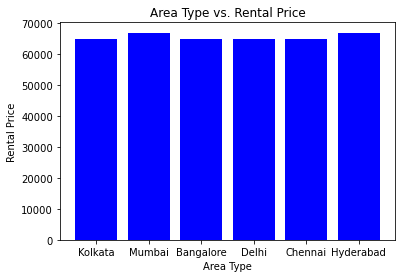

In [89]:
# How much does city/location affect the price?


# Set x and y values:
x_values = rental_clean_df["City"]
y_values = rental_clean_df["Rental Price"]


# Plot both the "Latitdue vs. Max Temperature" and the line equation values in one plot:
plt.bar(x_values, y_values, color="blue")



# Set the title, xlabel and ylabels as shown below:
plt.title("Area Type vs. Rental Price")
plt.xlabel("Area Type")
plt.ylabel("Rental Price")
plt.show()

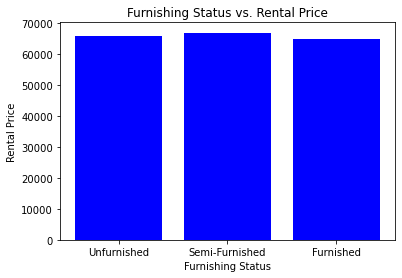

In [90]:
# How much does Furnishing Status affect the price?


# Set x and y values:
x_values = rental_clean_df["Furnishing Status"]
y_values = rental_clean_df["Rental Price"]


# Plot both the "Latitdue vs. Max Temperature" and the line equation values in one plot:
plt.bar(x_values, y_values, color="blue")



# Set the title, xlabel and ylabels as shown below:
plt.title("Furnishing Status vs. Rental Price")
plt.xlabel("Furnishing Status")
plt.ylabel("Rental Price")
plt.show()

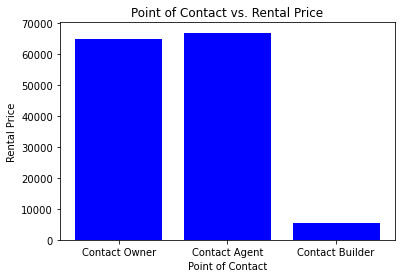

In [91]:
# How much does Point of Contact affect the price?


# Set x and y values:
x_values = rental_clean_df["Point of Contact"]
y_values = rental_clean_df["Rental Price"]


# Plot both the "Latitdue vs. Max Temperature" and the line equation values in one plot:
plt.bar(x_values, y_values, color="blue")



# Set the title, xlabel and ylabels as shown below:
plt.title("Point of Contact vs. Rental Price")
plt.xlabel("Point of Contact")
plt.ylabel("Rental Price")
plt.show()

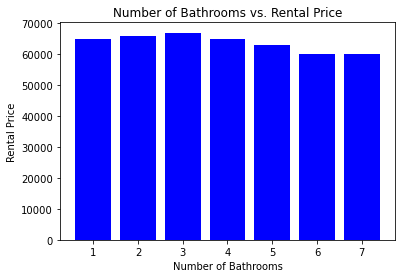

In [92]:
# How much does Number of Bathrooms affect the price?


# Set x and y values:
x_values = rental_clean_df["Number of Bathrooms"]
y_values = rental_clean_df["Rental Price"]


# Plot both the "Latitdue vs. Max Temperature" and the line equation values in one plot:
plt.bar(x_values, y_values, color="blue")



# Set the title, xlabel and ylabels as shown below:
plt.title("Number of Bathrooms vs. Rental Price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Rental Price")
plt.show()